<a href="https://colab.research.google.com/github/siri2037/nlp/blob/main/NLP4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**REQUIRED LIBRARIES:**

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud


###**CONNECTING TO GOOGLE DRIVE:**

In [6]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import os


directory_path = '/content/drive/My Drive/NLP DATASETS/'


if os.path.exists(directory_path):
    print(f"Contents of '{directory_path}':")
    for item in os.listdir(directory_path):
        print(item)
else:
    print(f"Directory not found: '{directory_path}'\nPlease ensure Google Drive is mounted and the path is correct.")

Contents of '/content/drive/My Drive/NLP DATASETS/':
arxiv_data.csv


###**CLEANING THE TEXT:**

In [18]:
def clean_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

abstracts = [clean_text(text) for text in raw_abstracts if len(text.strip()) > 20]
abstracts = abstracts[:1000]
print(f"Cleaned {len(abstracts)} abstracts ready for TF-IDF.")
print("Sample cleaned abstract:", abstracts[0][:200] + "...")


Cleaned 2 abstracts ready for TF-IDF.
Sample cleaned abstract: titlessummariesterms survey on semantic stereo matching semantic depth estimationstereo matching is one of the widely used techniques for inferring depth from stereo images owing to its robustness and...


###**TOP 20 TERMS ACROSS THE CORPUS:**

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=500,
    min_df=1,
    max_df=1.0
)
tfidf_matrix = vectorizer.fit_transform(abstracts)
feature_names = np.array(vectorizer.get_feature_names_out())

sum_tfidf = np.asarray(tfidf_matrix.sum(axis=0)).flatten()
top20_idx = np.argsort(sum_tfidf)[-20:][::-1]
top20_terms = feature_names[top20_idx]
top20_scores = sum_tfidf[top20_idx]

df_top20 = pd.DataFrame({'Term': top20_terms, 'TF-IDF Sum': np.round(top20_scores, 3)})
print("Top 20 Terms Across Corpus:")
print(df_top20)
print(f"\nFull TF-IDF features: {len(feature_names)} terms")

Top 20 Terms Across Corpus:
           Term  TF-IDF Sum
0      learning       0.696
1          data       0.457
2         model       0.411
3         image       0.405
4       network       0.348
5        method       0.305
6       methods       0.300
7        models       0.285
8         using       0.283
9          deep       0.280
10      propose       0.278
11       neural       0.276
12     proposed       0.264
13     networks       0.264
14  performance       0.262
15       images       0.255
16        paper       0.233
17      results       0.231
18     training       0.231
19        based       0.230

Full TF-IDF features: 500 terms


###**WORD CLOUD:**

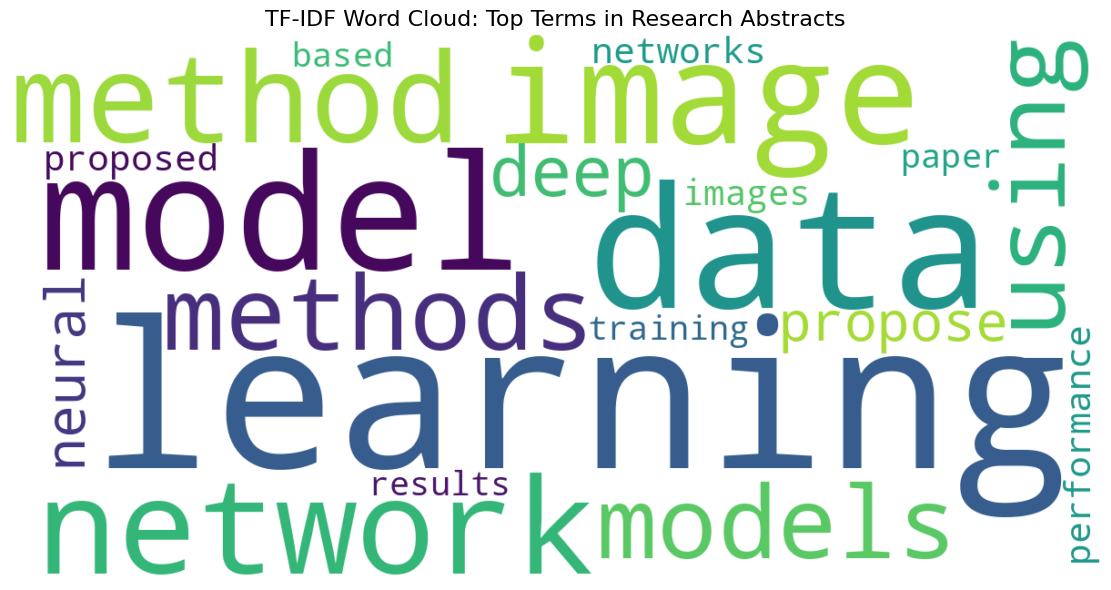

In [21]:
!pip install wordcloud -q
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_freq = dict(zip(top20_terms, top20_scores))
wc = WordCloud(
    width=1200, height=600,
    background_color='white',
    max_words=20,
    colormap='viridis'
).generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('TF-IDF Word Cloud: Top Terms in Research Abstracts', fontsize=16)
plt.tight_layout()
plt.show()


###**HEAT MAP:**

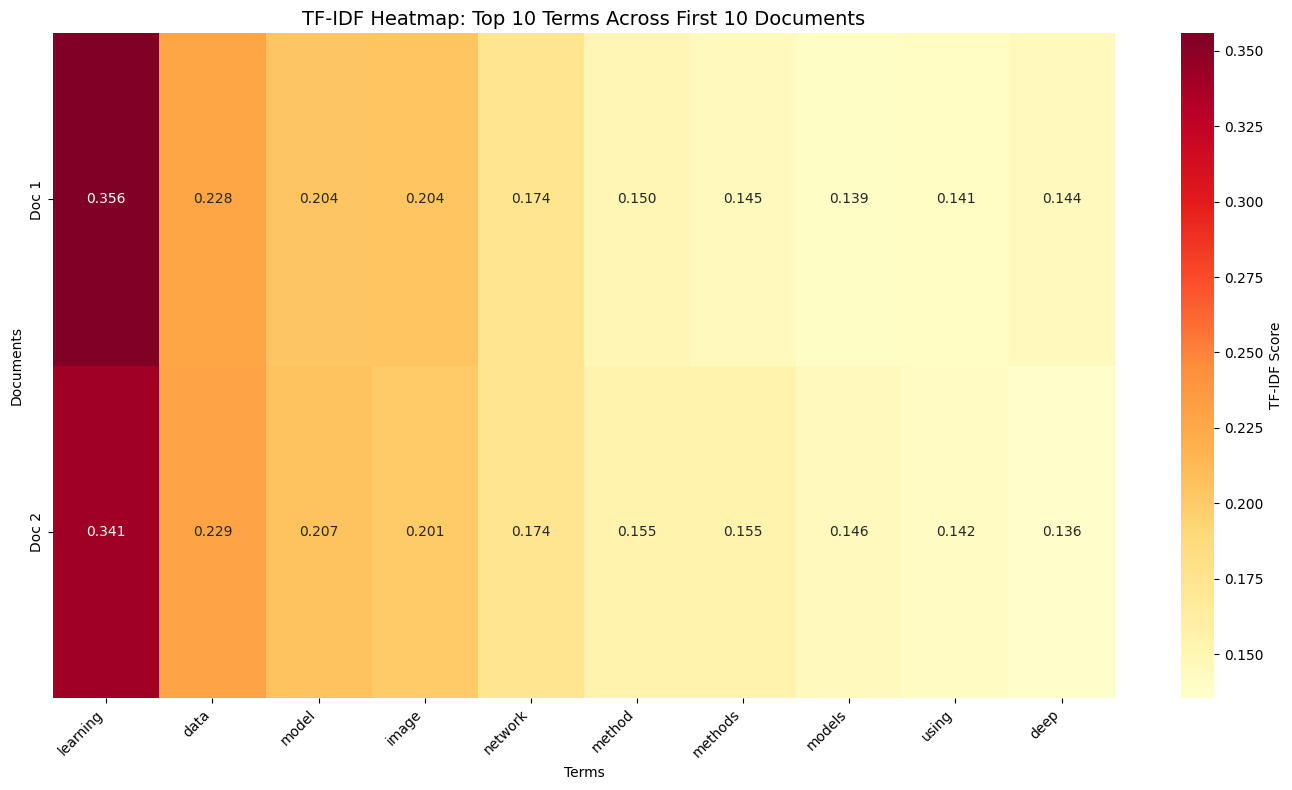

In [22]:
!pip install seaborn -q
import seaborn as sns

top_terms_n = 10
top_docs_n = min(10, len(abstracts))
top_terms_idx = np.argsort(sum_tfidf)[-top_terms_n:][::-1]
tfidf_heat = tfidf_matrix[:top_docs_n, top_terms_idx].toarray()
term_names_heat = feature_names[top_terms_idx]
doc_names = [f'Doc {i+1}' for i in range(top_docs_n)]

plt.figure(figsize=(14, 8))
sns.heatmap(
    tfidf_heat,
    xticklabels=term_names_heat,
    yticklabels=doc_names,
    annot=True,
    cmap='YlOrRd',
    fmt='.3f',
    cbar_kws={'label': 'TF-IDF Score'}
)
plt.title('TF-IDF Heatmap: Top 10 Terms Across First 10 Documents', fontsize=14)
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
